# >> WIND ENERGY ASSESSMENT FROM WEIBULL WIND DISTRIBUTION <<

## Step 1: Setup the analysis

#### >>> import the required modules

In [1]:
from weibull_energy_assessment.weibull import Weibull
from weibull_energy_assessment.weibull_energy_estimator import WeibullEnergyEstimator
from plant_info.turbine import Turbine
from power_analysis import power_modeler
import pandas as pd

#### >>> load turbine data and attribute database

In [2]:
data = pd.read_csv('data/simulated_turbine_data.csv')
turbine_info_db = pd.read_excel('data/turbine_info_db.xlsx')

#### >>> Instantiate analysis turbine

In [3]:
turbine = Turbine(t_id='T01', turbine_info_db=turbine_info_db)

## Step 2: Assess energy potential

#### >>> Use the weibull shape and scale parameters assocaited with the turbine's location to instantiate the weibull object

In [4]:
weibull = Weibull(a=turbine.weibull_a, k=turbine.weibull_k)

#### >>> Inspect wind resource info from weibull object

In [5]:
# mean wind speed in m/s
mean_ws = weibull.mean
print('Mean Wind Speed at Turbine Site: {:.2f} m/s'.format(mean_ws))

Mean Wind Speed at Turbine Site: 8.35 m/s


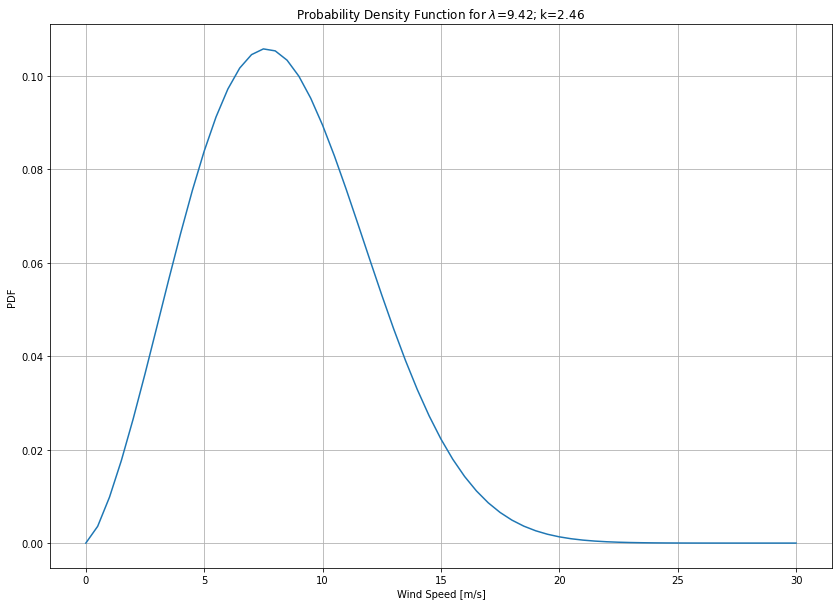

In [6]:
# plot pdf
%matplotlib inline
weibull.plot_pdf()

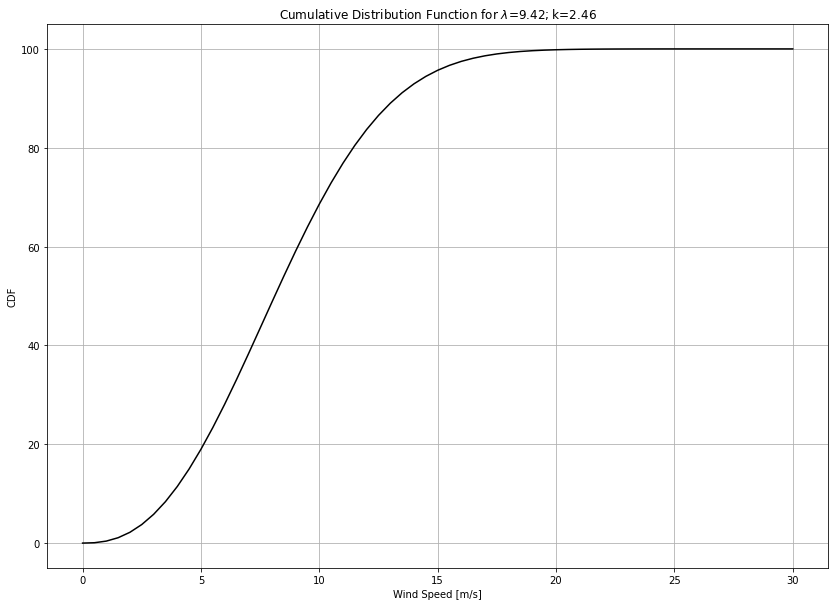

In [7]:
# plot cdf
weibull.plot_cdf()

#### >>> We can get gross energy estimates by passing the weibull object to WiebullEnergyEstimator

In [8]:
estimator = WeibullEnergyEstimator(weibull=weibull, rho=turbine.average_air_density)

In [9]:
# use the turbine's reference power curve to estimate gross energy
theoretical_gross_energy = estimator.gross_annual_energy_from_power_curve(turbine=turbine)

print('Theoretical Gross Energy: {:.0f} MWh'.format(theoretical_gross_energy))

Theoretical Gross Energy: 13030 MWh


## Step 3: Assess operational performance

### >> Suppose we would like to compare operating data of a turbine to assess its performance relative to the warranted power curve. We can generate a model based on operational data for the turbine. Then we can use the WeibullEnergyEstimator to evaluate the gross energy of the model and ascertain the performance loss. <<

#### >>> Instantiate PowerModeler

In [10]:
modeler = power_modeler.PowerModeler(turbine=turbine, pre_processed_data=data)

#### >>> Model the the turbine's performance

In [11]:
power_model = modeler.get_pygam_multi_param_model()

6000 points utilized for modeling.


#### >>> Compare the model to the operational data

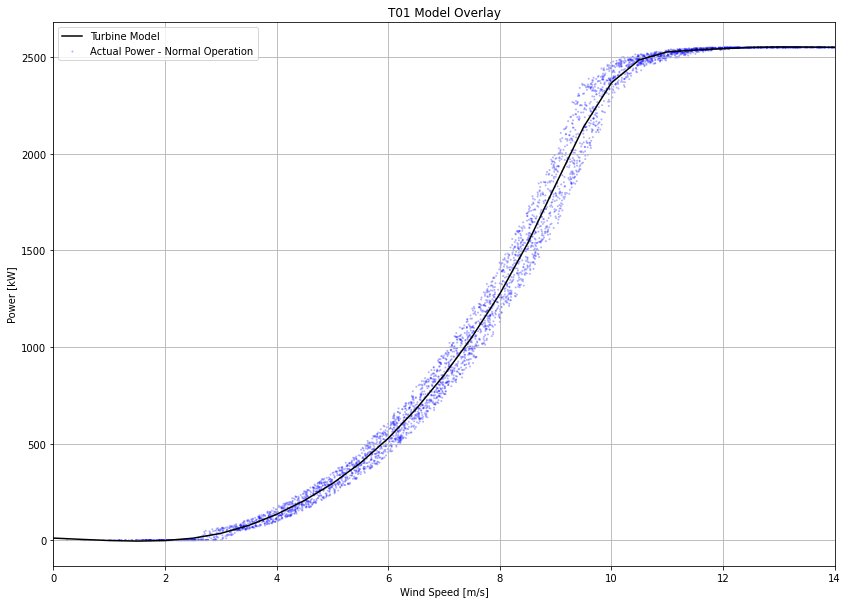

In [12]:
modeler.visualize_model(power_model=power_model, rho=turbine.average_air_density)

#### >>> Compare the modeled turbine performance to the warranted power curve

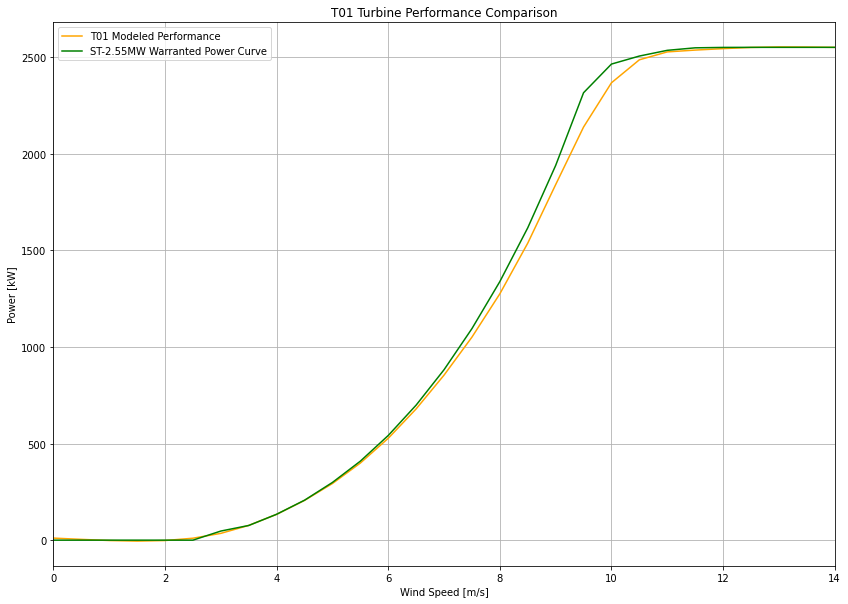

In [13]:
modeler.plot_model_vs_warranted_curve(power_model=power_model, rho=turbine.average_air_density)

#### >>> Now we can use the WeibullEnergyEstimator to estimate the gross energy based on the modeled turbine performance

In [14]:
model_based_gross_energy = estimator.gross_annual_energy_from_model(power_model=power_model)
print('Gross Energy Based on Modeled Turbine Performance: {:.0f} MWh'.format(model_based_gross_energy))

Gross Energy Based on Modeled Turbine Performance: 12736 MWh


#### >>> Finally, the annual performance loss of the turbine can be calculated

In [15]:
perf_loss = (theoretical_gross_energy - model_based_gross_energy)/theoretical_gross_energy
print('Performance Loss: {:.2f}%'.format(perf_loss*100))

Performance Loss: 2.26%
